# <div style="color:red;text-align:center;">画箭头（综合实例）</div>

### 一、实例

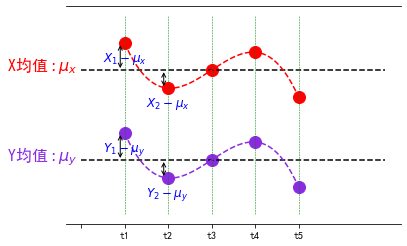

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def show_img(x_data,y1_data,y2_data,annotate_num=0):
    # 设置matplotlib库字体的非衬线字体为黑体
    plt.rcParams["font.sans-serif"]=["SimHei"]
    # 设置matplotlib库字体族为非衬线字体
    plt.rcParams["font.family"]="sans-serif"

    fig, ax = plt.subplots()
    # 取消边框
    for key, spine in ax.spines.items():
        # 'left', 'right', 'bottom', 'top'
        if key == 'left' or key == 'right':
            spine.set_visible(False)
    plt.xticks(np.arange(6), ('','t1', 't2', 't3', 't4', 't5'))
    plt.yticks([])

    # 上部分图
    x_mean=[0,2,3,4,7]
    #x_list=[1,2,3,4,5]
    x_list=x_data

    x=np.array(x_list)
    # [19,14,16,18,13]
    y=np.array(y1_data)
    y_mean=np.mean(y)
    y_mean_list=y_mean.repeat(5)
    #plt.plot(x,y,'ro')
    plt.plot(x,y,color='red', marker='o', linestyle='dashed',linewidth=0, markersize=12)
    plt.plot(x_mean,y_mean_list,'k--')
    x_smooth = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max
    y_smooth = make_interp_spline(x, y)(x_smooth)
    plt.plot(x_smooth,y_smooth,'r--')
    plt.text(-1.7,np.mean(y),r'X均值'+r'$:\mu_x$', fontdict={'size':16,'color':'r'})

    # 下部分图
    # [9,4,6,8,3]
    y2=np.array(y2_data)
    y2_mean=np.mean(y2)
    y2_mean_list=y2_mean.repeat(5)
    #plt.plot(x,y,'ro')
    plt.plot(x,y2,color='blueviolet', marker='o', linestyle='dashed',linewidth=0, markersize=12)
    plt.plot(x_mean,y2_mean_list,'k--')
    x2_smooth = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max
    y2_smooth = make_interp_spline(x, y2)(x2_smooth)
    plt.plot(x2_smooth,y2_smooth,color='blueviolet',linestyle='dashed')
    plt.text(-1.7,y2_mean,r'Y均值'+r'$:\mu_y$', fontdict={'size':16,'color':'blueviolet'})

    # 画虚线
    d_y=np.linspace(0,22,10)
    for i in range(len(x_list)):
        d_x=np.array([x_list[i] for j in range(10)])
        plt.plot(d_x,d_y,'g--',linewidth=0.5)

    # 注释箭头线
    if(annotate_num>len(x_list)):
        annotate_num=len(x_list)
    if(annotate_num<0):
        annotate_num=0
    for i in range(annotate_num):
        # 第一组注释线    
        ax.annotate("", xy=(x_data[i]-0.1, y2_mean), xytext=(x_data[i]-0.1, y2_data[i]),arrowprops=dict(arrowstyle="<->"))
        plt.text(x_data[i]-0.5,y2_data[i]-2,r'$Y_{}-\mu_y$'.format(i+1), fontdict={'size':12,'color':'b'})
        ax.annotate("", xy=(x_data[i]-0.1, y_mean), xytext=(x_data[i]-0.1, y1_data[i]),arrowprops=dict(arrowstyle="<->"))
        plt.text(x_data[i]-0.5,y1_data[i]-2,r'$X_{}-\mu_x$'.format(i+1), fontdict={'size':12,'color':'b'})
    
    # t时刻标注
    plt.show()
    pass

    
show_img([1,2,3,4,5],[19,14,16,18,13],[9,4,6,8,3],2)

### 二、自己来动手

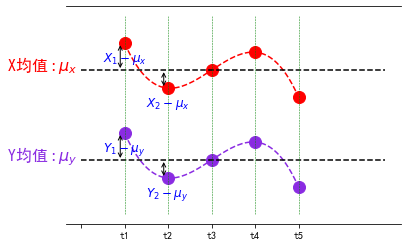

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def show_img2(x_data,y1_data,y2_data,annotate_num=0):
    # 设置matplotlib库字体的非衬线字体为黑体
    plt.rcParams["font.sans-serif"]=["SimHei"]
    # 设置matplotlib库字体族为非衬线字体
    plt.rcParams["font.family"]="sans-serif"

    fig, ax = plt.subplots()
    # 取消边框
    for key, spine in ax.spines.items():
        # 'left', 'right', 'bottom', 'top'
        if key == 'left' or key == 'right':
            spine.set_visible(False)

    plt.xticks(np.arange(6), ('','t1', 't2', 't3', 't4', 't5'))
    plt.yticks([])

    # 第一条线
    # [1,2,3,4,5]
    x_list=x_data
    # [19,14,16,18,13]
    y1_list=y1_data
    x=np.array(x_list)
    y1=np.array(y1_list)
    plt.plot(x, y1, color='red', marker='o', linestyle='dashed',linewidth=0, markersize=12)

    # 几个点画曲线
    x1_smooth = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max
    y1_smooth = make_interp_spline(x, y1)(x1_smooth)
    plt.plot(x1_smooth,y1_smooth,color='red',linestyle='dashed')

    # 平均线
    x_mean=[0,7]
    y1_mean=y1.mean()
    y1_mean_arr=y1_mean.repeat(2)
    # print(y1_mean)
    # print(y1_mean_arr)
    plt.plot(x_mean,y1_mean_arr,'k--')
    plt.text(-1.7,y1_mean,r'X均值'+r'$:\mu_x$', fontdict={'size':16,'color':'red'})

    # =====================================================
    # 第二条线
    # [1,2,3,4,5]
    x_list=x_data
    # [9,4,6,8,3]
    y2_list=y2_data
    x=np.array(x_list)
    y2=np.array(y2_list)
    plt.plot(x, y2, color='blueviolet', marker='o', linestyle='dashed',linewidth=0, markersize=12)

    # 几个点画曲线
    x2_smooth = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max
    y2_smooth = make_interp_spline(x, y2)(x2_smooth)
    plt.plot(x2_smooth,y2_smooth,color='blueviolet',linestyle='dashed')

    # 平均线
    x_mean=[0,7]
    y2_mean=y2.mean()
    y2_mean_arr=y2_mean.repeat(2)
    # print(y2_mean)
    # print(y2_mean_arr)
    plt.plot(x_mean,y2_mean_arr,'k--')
    plt.text(-1.7,y2_mean,r'Y均值'+r'$:\mu_y$', fontdict={'size':16,'color':'blueviolet'})

    # =====================================================
    # 画虚线
    d_y=[0,22]
    # print(d_y)
    for i in range(len(x_list)):
        d_x=np.array([x_list[i] for _ in range(2)])
        # print(d_x)
        plt.plot(d_x,d_y,'g--',linewidth=0.5)

    # =====================================================
    # 画注释箭头
    if(annotate_num>len(x_list)):
        annotate_num=len(x_list)
    if(annotate_num<0):
        annotate_num=0
    for i in range(annotate_num):
        ax.annotate("", xy=(x_list[i]-0.1, y2_mean), xytext=(x_list[i]-0.1, y2_list[i]),arrowprops=dict(arrowstyle="<->"))
        plt.text(x_list[i]-0.5,y2_list[i]-2,r'$Y_{}-\mu_y$'.format(i+1), fontdict={'size':12,'color':'b'})
        ax.annotate("", xy=(x_list[i]-0.1, y1_mean), xytext=(x_list[i]-0.1, y1_list[i]),arrowprops=dict(arrowstyle="<->"))
        plt.text(x_list[i]-0.5,y1_list[i]-2,r'$X_{}-\mu_x$'.format(i+1), fontdict={'size':12,'color':'b'})


    plt.show()
show_img2([1,2,3,4,5],[19,14,16,18,13],[9,4,6,8,3],2)

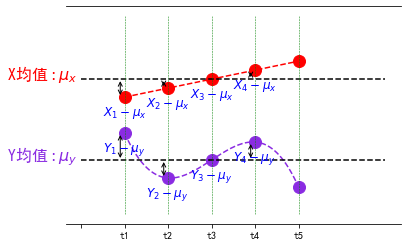

In [19]:
show_img2([1,2,3,4,5],[13,14,15,16,17],[9,4,6,8,3],4)

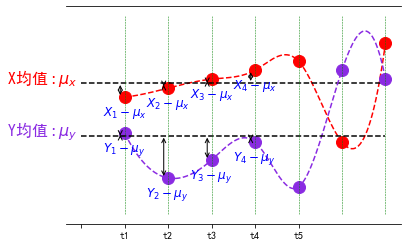

In [20]:
show_img2([1,2,3,4,5,6,7],[13,14,15,16,17,8,19],[9,4,6,8,3,16,15],4)